<a href="https://colab.research.google.com/github/Tanmay-jam/Pytorch-Digit-Classifier/blob/main/Handwritten_Digits_Classifier_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

**Loading Data**

The dataset is not normalized and hence mean and standard deviation of data is 0.1307 and 0.3081

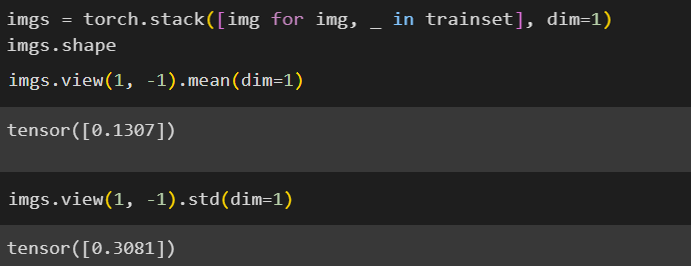

While loading data we apply transforms.

1. convert images to tensor
2. Normalize dataset with mean=0.1307 and standar deviation=0.3081

Normalization helps to get pixel values to optimal range and better comparison of values.

Data is loaded into training set and testing set differently with batch size of 64. Getting data in batches makes training faster.


In [ ]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307), (0.3081))
                               ])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST('MNIST_data/',download=True, train=True, transform=transform)
traindataloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST('MNIST_data/',download=True, train=False, transform=transform)
testdataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Each batch contains 64 grayscale images with 28 by 28 pixels.

**Visualizing data**

In [ ]:
## This cell contains a function for showing 5 images from a dataloader##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


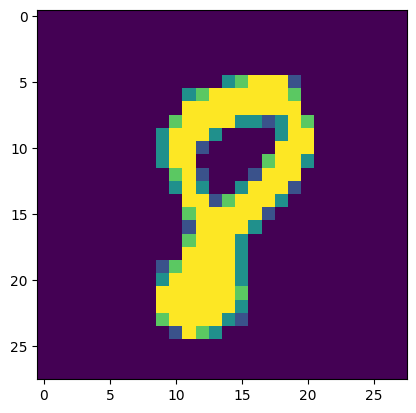

0


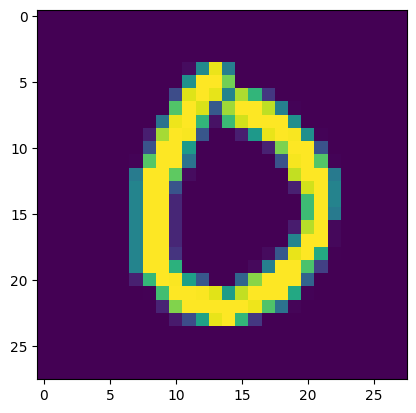

2


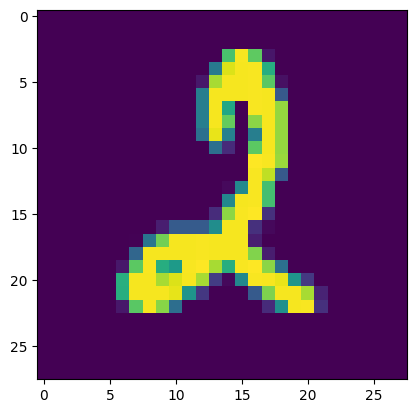

1


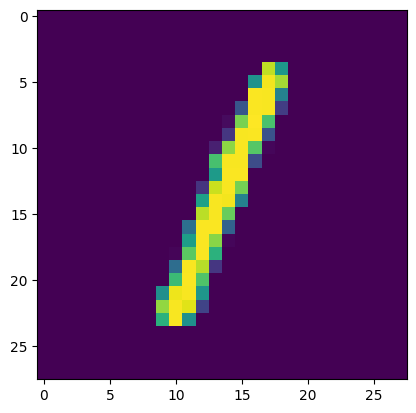

1


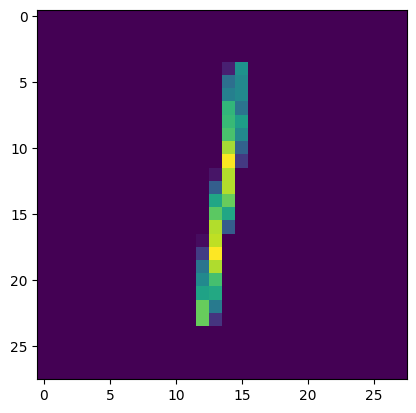

In [ ]:
# Explore data
show5(traindataloader)

**Building Model**

In [ ]:
#Base Model
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 144)
        self.output = nn.Linear(144, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [ ]:
#model instansiation
model = Network()

#defining loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in {0} epoch: {1}",epoch,running_loss)

<ipython-input-36-034795803958>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


average loss in {0} epoch: {1} 0 2159.8815443515778
average loss in {0} epoch: {1} 1 2158.315084695816
average loss in {0} epoch: {1} 2 2157.107011795044
average loss in {0} epoch: {1} 3 2155.898613214493
average loss in {0} epoch: {1} 4 2154.379814863205
average loss in {0} epoch: {1} 5 2152.1008529663086
average loss in {0} epoch: {1} 6 2148.0274090766907
average loss in {0} epoch: {1} 7 2138.9329891204834
average loss in {0} epoch: {1} 8 2118.394107103348
average loss in {0} epoch: {1} 9 2092.7843174934387


In [ ]:
#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-36-034795803958>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


10000
Accuracy of the model on 10000 test images:  21.08


**Improve Model**

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in {0} epoch: {1}",epoch,running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-41-498ebf1ddb5f>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


average loss in {0} epoch: {1} 0 2140.0955245494843
average loss in {0} epoch: {1} 1 2040.6117553710938
average loss in {0} epoch: {1} 2 1934.0585483312607
average loss in {0} epoch: {1} 3 1873.5730137825012
average loss in {0} epoch: {1} 4 1835.423374414444
average loss in {0} epoch: {1} 5 1800.9786834716797
average loss in {0} epoch: {1} 6 1767.0225143432617
average loss in {0} epoch: {1} 7 1744.8629672527313
average loss in {0} epoch: {1} 8 1722.8892835378647
average loss in {0} epoch: {1} 9 1692.0315647125244
10000
Accuracy of the model on 10000 test images:  72.86


Removing second hidden layer causes increase in acuuracy from 21.08% to 72.6%

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        x = self.softmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in {0} epoch: {1}",epoch,running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-43-2b2539a51c3f>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


average loss in {0} epoch: {1} 0 1849.8884763717651
average loss in {0} epoch: {1} 1 1588.4244340658188
average loss in {0} epoch: {1} 2 1526.0431871414185
average loss in {0} epoch: {1} 3 1502.7594571113586
average loss in {0} epoch: {1} 4 1489.8584082126617
average loss in {0} epoch: {1} 5 1481.2242858409882
average loss in {0} epoch: {1} 6 1474.9197473526
average loss in {0} epoch: {1} 7 1469.9513998031616
average loss in {0} epoch: {1} 8 1465.9454861879349
average loss in {0} epoch: {1} 9 1462.4765157699585
10000
Accuracy of the model on 10000 test images:  92.48


Replacing sigmoid activation function with tanh increses accuracy on test data from 72.6% to 92.35%

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.logsoftmax = nn.LogSoftmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        x = self.logsoftmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in {0} epoch: {1}",epoch,running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-45-17f35b3e04b2>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.logsoftmax(x)


average loss in {0} epoch: {1} 0 538.9878185689449
average loss in {0} epoch: {1} 1 299.2090526521206
average loss in {0} epoch: {1} 2 258.8554218709469
average loss in {0} epoch: {1} 3 232.52446326985955
average loss in {0} epoch: {1} 4 211.76732094585896
average loss in {0} epoch: {1} 5 194.29218394309282
average loss in {0} epoch: {1} 6 179.1291956230998
average loss in {0} epoch: {1} 7 166.24603259190917
average loss in {0} epoch: {1} 8 155.1155659481883
average loss in {0} epoch: {1} 9 145.23833394050598
10000
Accuracy of the model on 10000 test images:  95.66


Replacing Softmax activation function with Logsotmax increases accuracy on test data from 92.35% to 95.56%

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.logsoftmax = nn.LogSoftmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        x = self.logsoftmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(15):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in {0} epoch: {1}",epoch,running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-48-b30345e0a695>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.logsoftmax(x)


average loss in {0} epoch: {1} 0 548.0117731317878
average loss in {0} epoch: {1} 1 301.97890893369913
average loss in {0} epoch: {1} 2 261.24496237933636
average loss in {0} epoch: {1} 3 234.65604294091463
average loss in {0} epoch: {1} 4 213.64504857361317
average loss in {0} epoch: {1} 5 195.89227540045977
average loss in {0} epoch: {1} 6 180.93750711157918
average loss in {0} epoch: {1} 7 167.63649788498878
average loss in {0} epoch: {1} 8 156.24692256003618
average loss in {0} epoch: {1} 9 145.8328219279647
average loss in {0} epoch: {1} 10 136.94485156424344
average loss in {0} epoch: {1} 11 128.79337241314352
average loss in {0} epoch: {1} 12 121.68718747422099
average loss in {0} epoch: {1} 13 114.93662501871586
average loss in {0} epoch: {1} 14 109.22145562246442
10000
Accuracy of the model on 10000 test images:  96.53


Increasing number of epochs to 15 increases accuracy on test data from 95% to 96.53%

**Save the Model**

In [49]:
torch.save(model.state_dict(), 'Digitclassifier.pth')